# Challenge: Latency Prediction (LatenceTech 🛜)

# Installing Dependencies

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [2]:
import pandas as pd;
import numpy as np;
import random;
import matplotlib.pyplot as plt;

# Data

## Loading the Data

In [3]:
df_original = pd.read_csv('dataset/participant_data.csv');
column_names = df_original.columns;
for col in column_names: print("Feature: " + col);
df_original

Feature: _time
Feature: agentID
Feature: Altitude
Feature: Latitude
Feature: Longitude
Feature: http_result
Feature: icmp_result
Feature: tcp_result
Feature: udp_result


,_time,agentID,Altitude,Latitude,Longitude,http_result,icmp_result,tcp_result,udp_result
0,2024-09-20 17:19:05+00:00,752813491.0,20.292809,45.496175,-73.561853,29.991,49.161,30.106,58.090
1,2024-09-20 17:19:03+00:00,752813491.0,20.292809,45.496175,-73.561853,29.955,59.476,30.031,69.706
2,2024-09-20 17:19:01+00:00,752813491.0,20.292809,45.496175,-73.561853,33.209,31.992,29.947,42.514
3,2024-09-20 17:18:59+00:00,752813491.0,20.292809,45.496175,-73.561853,30.057,64.112,30.036,74.137
4,2024-09-20 17:18:57+00:00,752813491.0,20.292809,45.496175,-73.561853,39.228,43.609,30.135,53.984
...,...,...,...,...,...,...,...,...,...
2593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
origData = df_original.to_numpy();
randSample = origData[random.randint(0,len(origData)-1)]; # for inspection

print("Type of Array with original data: " + str(type(origData)));
print("Type of a record in the original data: " + str(type(randSample)));
print("Number of records in the original dataset: " + str(len(origData)));
print("Number of features in a record: " + str(randSample.size));
print("Dimensionality of a record: " + str(randSample.ndim));
print("Dimensionality of the entire data array: " + str(origData.ndim));
print("Shape of the Array: " + str(origData.shape));
print("Shape of a record: " + str(randSample.shape));

Type of Array with original data: <class 'numpy.ndarray'>
Type of a record in the original data: <class 'numpy.ndarray'>
Number of records in the original dataset: 2598
Number of features in a record: 9
Dimensionality of a record: 1
Dimensionality of the entire data array: 2
Shape of the Array: (2598, 9)
Shape of a record: (9,)


## Data Cleansing

In `Data Preprocessing.ipynb`, we already cleansed the data with 2 different approaches. Now, we import those csv files in a Pandas table. 

### Approach 1: Cleaned using the "Mean" to replace NaN or Empty values

In [5]:
df_cleaned_mean = pd.read_csv('dataset/participant_data_cleaned_mean.csv');
column_names = df_cleaned_mean.columns;
for col in column_names: print("Feature: " + col);
df_cleaned_mean

Feature: _time
Feature: http_result
Feature: icmp_result
Feature: tcp_result
Feature: udp_result


,_time,http_result,icmp_result,tcp_result,udp_result
0,2024-09-20 17:19:03+00:00,29.955,59.476,30.031,69.706
1,2024-09-20 17:19:01+00:00,33.209,31.992,29.947,42.514
2,2024-09-20 17:18:59+00:00,30.057,64.112,30.036,74.137
3,2024-09-20 17:18:57+00:00,39.228,43.609,30.135,53.984
4,2024-09-20 17:18:55+00:00,34.133,35.945,30.996,44.054
...,...,...,...,...,...
1929,2024-09-16 17:13:27+00:00,12.473,11.588,12.961,14.024
1930,2024-09-16 17:13:25+00:00,22.238,12.144,12.141,20.624
1931,2024-09-16 17:13:23+00:00,14.019,17.161,14.217,24.523
1932,2024-09-16 17:13:21+00:00,11.645,12.584,13.018,17.155


Check if there're still NaN / Empty cells

In [6]:
df_cleaned_mean.isna().any()

_time          False
http_result    False
icmp_result    False
tcp_result     False
udp_result     False
dtype: bool

### Approach 2: Cleaned using the "Median" to replace NaN or Empty values

In [7]:
df_cleaned_median = pd.read_csv('dataset/participant_data_cleaned_median.csv');
column_names = df_cleaned_median.columns;
for col in column_names: print("Feature: " + col);
df_cleaned_median

Feature: _time
Feature: http_result
Feature: icmp_result
Feature: tcp_result
Feature: udp_result


,_time,http_result,icmp_result,tcp_result,udp_result
0,2024-09-20 17:19:03+00:00,29.955,59.476,30.031,69.706
1,2024-09-20 17:19:01+00:00,33.209,31.992,29.947,42.514
2,2024-09-20 17:18:59+00:00,30.057,64.112,30.036,74.137
3,2024-09-20 17:18:57+00:00,39.228,43.609,30.135,53.984
4,2024-09-20 17:18:55+00:00,34.133,35.945,30.996,44.054
...,...,...,...,...,...
1929,2024-09-16 17:13:27+00:00,12.473,11.588,12.961,14.024
1930,2024-09-16 17:13:25+00:00,22.238,12.144,12.141,20.624
1931,2024-09-16 17:13:23+00:00,14.019,17.161,14.217,24.523
1932,2024-09-16 17:13:21+00:00,11.645,12.584,13.018,17.155


Check if there're still NaN / Empty cells

In [8]:
df_cleaned_median.isna().any()

_time          False
http_result    False
icmp_result    False
tcp_result     False
udp_result     False
dtype: bool

### Intuition: Finding if those 2 approaches exported different data or exact same data

In [9]:
# By comparing the values between "Mean" approach and "Median" approach
# We try to see if there're False values = inconsistencies
np.unique((df_cleaned_mean == df_cleaned_median).to_numpy())

array([False,  True])

Hence, we know that both approaches exported different data (i.e., not exactly the same), based on the original dataset. 

## Visualizing the Data

### Data that was cleansed with the mean to replace empty values

In [34]:
# convert the type of value in _time column from string to datetime (for plotting)
df_cleaned_mean['_time'] = pd.to_datetime(df_cleaned_mean['_time'])

,_time,http_result,icmp_result,tcp_result,udp_result
0,2024-09-20 17:19:03+00:00,29.955,59.476,30.031,69.706
1,2024-09-20 17:19:01+00:00,33.209,31.992,29.947,42.514
2,2024-09-20 17:18:59+00:00,30.057,64.112,30.036,74.137
3,2024-09-20 17:18:57+00:00,39.228,43.609,30.135,53.984
4,2024-09-20 17:18:55+00:00,34.133,35.945,30.996,44.054
...,...,...,...,...,...
1929,2024-09-16 17:13:27+00:00,12.473,11.588,12.961,14.024
1930,2024-09-16 17:13:25+00:00,22.238,12.144,12.141,20.624
1931,2024-09-16 17:13:23+00:00,14.019,17.161,14.217,24.523
1932,2024-09-16 17:13:21+00:00,11.645,12.584,13.018,17.155


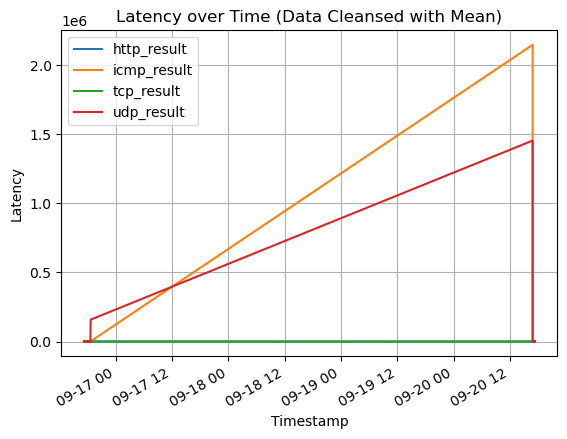

In [33]:
df_cleaned_mean.plot(x = '_time');
plt.title('Latency over Time (Data Cleansed with Mean)');
plt.xlabel('Timestamp')
plt.ylabel('Latency')
plt.grid()
plt.show()

### Data that was cleansed with the median to replace empty values

In [12]:
# convert the type of value in _time column from string to datetime (for plotting)
df_cleaned_median['_time'] = pd.to_datetime(df_cleaned_median['_time'])

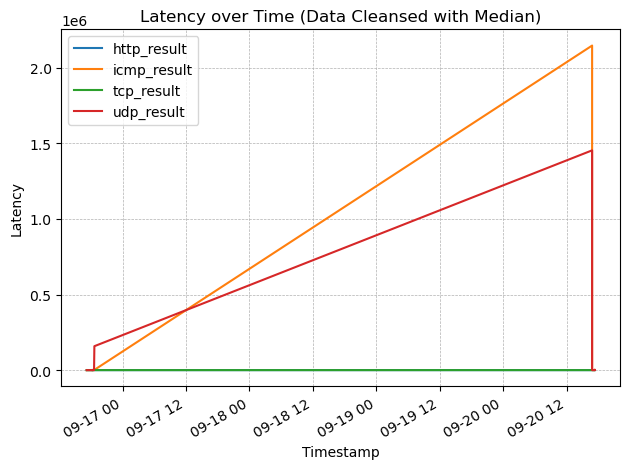

In [44]:
df_cleaned_median.plot(x = '_time');
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Latency over Time (Data Cleansed with Median)');
plt.xlabel('Timestamp')
plt.ylabel('Latency')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Machine Learning Modelling

## Creating the Model

In [35]:
# Instantiate and move the model to the correct device
model = FeedForwardNN(input_shape=3, hidden_units=128, output_shape=1).to(device)

NameError: name 'FeedForwardNN' is not defined

## Fitting the Model with Training Data

## Verify if Fitting is performed correctly

# Perform Predictions with the Model

# Evaluate the Performance of the Model

# Conclusion and Further Discussion